# Проект-исследование

## Содержательная постановка задачи ##

Компания занимается продажей продуктов питания. У компании есть как физические точки продаж, так и интернет-магазин. Регулярно проводятся маркетинговые активности (массовые или триггерные рассылки), которые заключаются в оповещении клиентов о новых скидках и акциях на продукты. Клиентская база компании стала достаточно объемной, из-за чего возникла необходимость ее сегментирования на группы для повышения лояльности клиентов и эффективности триггерных рассылок. После того, как будет выявлено число кластеров, необходимо спрогнозировать новую группу клиентов и охаректиризовать ее.

Информация была собрана за 2 года. Ссылка на источник данных: https://www.kaggle.com/imakash3011/customer-personality-analysis

### Описание данных

Все данные делятся на четыре блока: общая информация по клиентам; продукты, покупаемые клиентами; маркетинговые активности; место взаимодействия клиента и компании.

Информация по контактам клиентской базы 
 - ID: уникальный идентификатор клиента 
 - Year_Birth: год рождения клиента. 
 - Education: уровень образования клиента 
 - Marital_Status: семейное положение клиента. 
 - Income: годовой доход семьи клиента. 
 - Kidhome: Количество детей в семье клиента 
 - Teenhome: количество подростков в семье клиента 
 - Dt_Customer: Дата регистрации клиента в компании. 
 - Recency: количество дней с момента последней покупки клиента. 
 - Complain: 1, если клиент жаловался за последние 2 года, 0 в противном случае 

Продукты, покупаемые клиентами
 - MntWines: сумма, потраченная на вино за последние 2 года. 
 - MntFruits: сумма, потраченная на фрукты за последние 2 года. 
 - MntMeatProducts: сумма, потраченная на мясо за последние 2 года. 
 - MntFishProducts: сумма, потраченная на рыбу за последние 2 года. 
 - MntSweetProducts: сумма, потраченная на сладости за последние 2 года. 
 - MntGoldProds: сумма, потраченная на золото за последние 2 года. 

Маркетинговые активности
 - NumDealsPurchases: количество покупок со скидкой. 
 - AcceptedCmp1: 1, если клиент принял предложение в 1-й кампании, 0 в противном случае 
 - AcceptedCmp2: 1, если клиент принял предложение во 2-й кампании, 0 в противном случае 
 - AcceptedCmp3: 1, если клиент принял предложение в 3-й кампании, 0 в противном случае 
 - AcceptedCmp4: 1, если клиент принял предложение в 4-й кампании, 0 в противном случае 
 - AcceptedCmp5: 1, если клиент принял предложение в 5-й кампании, 0 в противном случае 
 - Response: 1, если клиент принял предложение в последней кампании, 0 в противном случае 

Место взаимодействия клиента и компании
 - NumWebPurchases: количество покупок, совершенных через веб-сайт компании. 
 - NumCatalogPurchases: количество покупок, сделанных с использованием каталога. 
 - NumStorePurchases: количество покупок, совершенных непосредственно в магазинах. 
 - NumWebVisitsMonth: количество посещений веб-сайта компании за последний месяц.

## Кластеризация

### Импорт бибилотек

Прежде, чем начать обработку сделаем импорт необходимых библиотек и методов, которые пригодятся по ходу исследования. Также зададим масштаб для графиков и диаграмм.

In [283]:
import pandas as pd
import numpy as np

import glob
import os

from matplotlib import pyplot as plt
import seaborn as sns

import datetime
import time

from sklearn import preprocessing
from sklearn.mixture import GaussianMixture


plt.figure(figsize=(30, 30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

### Предварительная обработка данных

Откроем исходный датасет, учитывая разделители. Определим неопределенные и нулвые значения, далее удалим включающие их строки из выборки.

In [316]:
df = pd.read_csv('C:\\Users\Юлия\pythonjul\marketing_campaign.csv', '\t', na_values= "NaN")
df1 = df.dropna(how='any')
df2 = df1.dropna()
df= df2.dropna(axis = 0, thresh=4)

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Посмотрим общую информацию по датасету

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Видим, что три параметра - Marital_Status, Educatio и Dt_Customer - имеют нечисловой формат. Чтобы принять решение по значимости данных факторов необходимо их преобразовать в числа.

Рассмотрим подробнее и преобразуем значения Marital_Status и Education в категории и далее используя метод cat.codes для кодирования в числовые значения.

In [127]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Преобразуем столбец в категорию, а затем используем эти значения категории для кодирования

In [317]:
df["Marital_Status"] = df["Marital_Status"].astype('category')

Теперь назначим закодированнуем с помощью метода доступа (accessor) cat.codes:

In [318]:
df["Marital_Status"] = df["Marital_Status"].cat.codes
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,4,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,4,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,5,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,5,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,3,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Аналогично поступим с "Education"

In [235]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [319]:
df["Education"] = df.Education.astype("category").cat.codes

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Таким образом закодированные числа соотвествуют следующим значениям переменных:
   - 'Single' : 4,  'Together' : 5, 'Divorced' : 2,'Widow' : 6,'Alone' : 1, 'Married' : 3, 'Absurd' : 0, 'YOLO' : 7
   - 'Graduation' : 2,'PhD' : 4, 'Master' : 3,'Basic' : 1

Значения из столбца "Year_Birth" будут более удобны для представления данных, если мы преобразуем года рождения в количество лет на момент сбора данных - добавим новый столбец "Years_Old"

In [320]:
df['Years_Old'] = 2014 - df['Year_Birth']

Преобразуем даты в столбце "Dt_Customer" в число, используя лямбда-функцию

In [321]:
df["Dt_Customer"] = df["Dt_Customer"].apply( lambda s: time.mktime(datetime.datetime.strptime(s, "%d-%m-%Y").timetuple()))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years_Old
0,5524,1957,2,4,58138.0,0,0,1.346706e+09,58,635,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,2,4,46344.0,1,1,1.394226e+09,38,11,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,2,5,71613.0,0,0,1.377032e+09,26,426,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,2,5,26646.0,1,0,1.391980e+09,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,4,3,58293.0,1,0,1.390079e+09,94,173,...,0,0,0,0,0,0,3,11,0,33


### Отбор признаков для проведения исследования

- Видим, что в датасете имеются два столбца с данными, описание которых не было предоставлнено вместе с датасетом - это Z_CostContact и Z_Revenue. Так как не известна природа этих данных, то примем решение их удалить и, соотвественно, не учитывать в исследовании.
- Значения ID клиентов никак не помогут для их сегментирования, более того у каждой строки таблицы по умолчанию имеется уникальный идентификатор
- Фиксирование факта жалоб от клиента можно изначально воспринимать как выбросы, так как из ифнормации по значением мы видим, что жалоб поступало действительно мало, а точнее меньше 25%
- Также отбросим признаки, которые касаются фактия принятия маркетинговой активности ("AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"), так как есть два других показателя, которые лучше подходят для характеристики сегменитрованных групп клиентов с точки зрения реакции на маркетинговые предложения - "NumDealsPurchases". Следом построим матрицу корреляций признаков


In [322]:
keep_columns = ['Years_Old', 
                'Education',
                'Marital_Status',
                'Income', 
                'Dt_Customer', 
                'Recency',
                'MntWines',
                'MntFruits', 
                'MntMeatProducts',
                'MntFishProducts', 
                'MntGoldProds', 
                'MntSweetProducts',
                'NumDealsPurchases', 
                'NumWebPurchases',
                'NumCatalogPurchases',
                'NumStorePurchases', 
                'NumWebVisitsMonth']
df = df[keep_columns]
df

,Years_Old,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntGoldProds,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,57,2,4,58138.0,1.346706e+09,58,635,88,546,172,88,88,3,8,10,4,7
1,60,2,4,46344.0,1.394226e+09,38,11,1,6,2,6,1,2,1,1,2,5
2,49,2,5,71613.0,1.377032e+09,26,426,49,127,111,42,21,1,8,2,10,4
3,30,2,5,26646.0,1.391980e+09,26,11,4,20,10,5,3,2,2,0,4,6
4,33,4,3,58293.0,1.390079e+09,94,173,43,118,46,15,27,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,47,2,3,61223.0,1.371071e+09,46,709,43,182,42,247,118,2,9,3,4,5
2236,68,4,5,64014.0,1.402348e+09,56,406,0,30,0,8,0,7,8,2,5,7
2237,33,2,2,56981.0,1.390597e+09,91,908,48,217,32,24,12,1,2,3,13,6
2238,58,3,5,69245.0,1.390511e+09,8,428,30,214,80,61,30,2,6,5,10,3


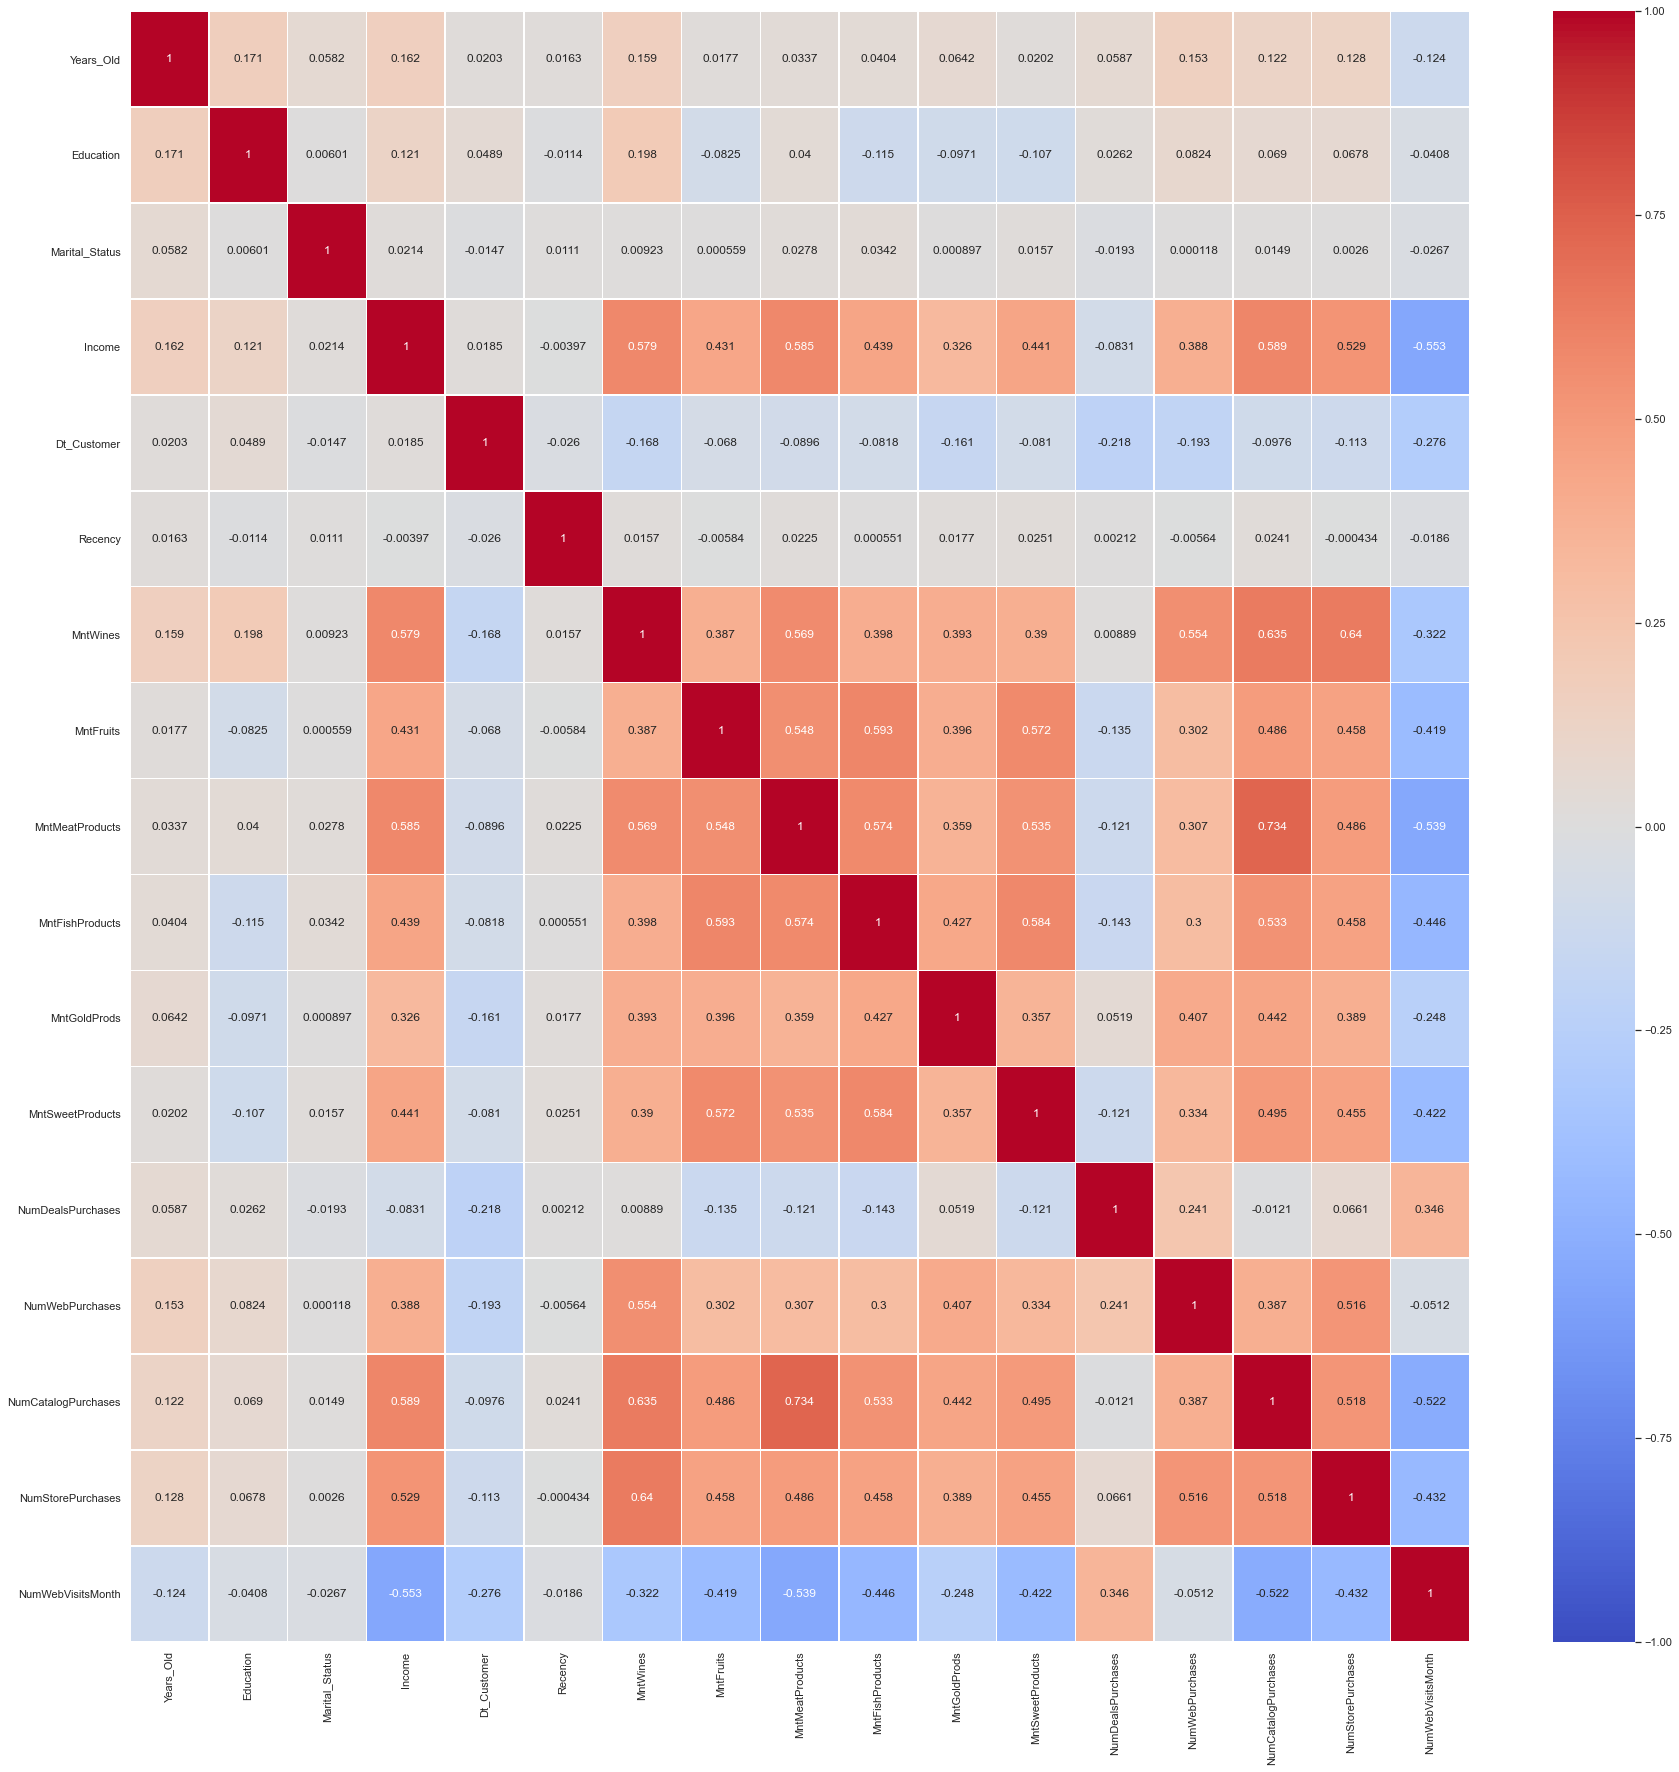

In [323]:
df_matrix = df.iloc[:,:]
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_matrix.corr(), annot = True, linewidths=.5, ax=ax, fmt = '.3g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

Большие значения корреляций между признаками выделены белым цветом - от них необходимо избавиться, предварительно проанализировав. 

Выводы по корреляции признаков из матрицы:
   - Количество покупаемых разных  единиц товаров продукции и факты покупок в физических и онлайн-магазине зависит от годового дохода клиента, таким образом может оставить признак "Income", а 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' исключить
   - Количество посещений веб-сайта магазина в месяц сильно связано с годовым доходом, поэтому его можно исключить, так как оставляем в рассмотрении "Income". Зметим, что признак 'NumWebVisitsMonth' не зависит от факта совершения покупки 

Таким образом оставим в дата-сете только те признаки, по которым не было принято решения исключения

In [325]:
keep_columns = ['Years_Old', 
                'Education',
                'Marital_Status',
                'Income', 
                'Dt_Customer', 
                'Recency',
                'NumDealsPurchases']
df = df[keep_columns]
df

,Years_Old,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases
0,57,2,4,58138.0,1.346706e+09,58,3
1,60,2,4,46344.0,1.394226e+09,38,2
2,49,2,5,71613.0,1.377032e+09,26,1
3,30,2,5,26646.0,1.391980e+09,26,2
4,33,4,3,58293.0,1.390079e+09,94,5
...,...,...,...,...,...,...,...
2235,47,2,3,61223.0,1.371071e+09,46,2
2236,68,4,5,64014.0,1.402348e+09,56,7
2237,33,2,2,56981.0,1.390597e+09,91,1
2238,58,3,5,69245.0,1.390511e+09,8,2


Построим новую матрицу корреляций

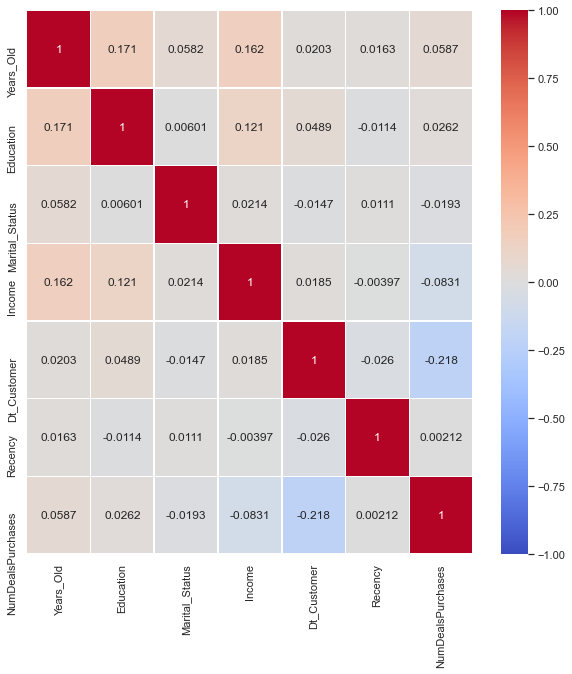

In [326]:
df_matrix = df.iloc[:,:]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_matrix.corr(), annot = True, linewidths=.5, ax=ax, fmt = '.3g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

Разброс значений среди всех признаков достаточно велик и для того, чтобы использовать эти данные для исследования, необходимо прежде их привести к виду с определенным разбросом значений для всех признаков. Для этого используем метод MinMaxScaler и перемасштабируем все значения признаков в диапазоне от 0 до 1.

In [327]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [328]:
df.to_csv("marketing_before_scaled.csv", index=False)
df = pd.read_csv("marketing_before_scaled.csv")
col = df.columns
result = scaler.fit_transform(df)

df = pd.DataFrame(result, columns=col)
df

,Years_Old,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases
0,0.378641,0.50,0.571429,0.084832,0.051502,0.585859,0.200000
1,0.407767,0.50,0.571429,0.067095,0.838340,0.383838,0.133333
2,0.300971,0.50,0.714286,0.105097,0.553648,0.262626,0.066667
3,0.116505,0.50,0.714286,0.037471,0.801144,0.262626,0.133333
4,0.145631,1.00,0.428571,0.085065,0.769671,0.949495,0.333333
...,...,...,...,...,...,...,...
2211,0.281553,0.50,0.428571,0.089472,0.454936,0.464646,0.133333
2212,0.485437,1.00,0.714286,0.093669,0.972818,0.565657,0.466667
2213,0.145631,0.50,0.285714,0.083092,0.778255,0.919192,0.066667
2214,0.388350,0.75,0.714286,0.101536,0.776824,0.080808,0.133333


### Проверка на выбросы

Для определения выбросов построим график boxplot или «Ящик с усами». Вид диаграммы boxplot в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы в виде отельных точек.

<AxesSubplot:>

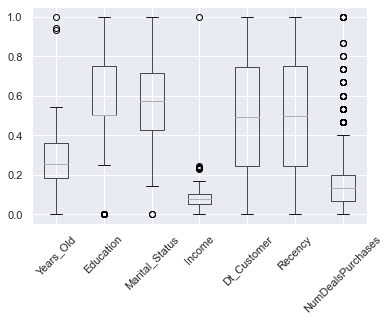

In [329]:
keep_columns_for_boxplot = ['Years_Old', 
                            'Education',
                            'Marital_Status',
                            'Income', 
                            'Dt_Customer', 
                            'Recency',
                            'NumDealsPurchases']
df.boxplot(keep_columns_for_boxplot, rot=45)


Из всех выпадающих точек за выбросы можно считать только значение "Income", так как долгожители или люди с базовым образованием вполне могут являться клиентами компании.

In [330]:
for i in ['Income']:
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[i] < min,i] = np.nan
    df.loc[df[i] > max,i] = np.nan
    
for k in ['Education']:
    q75,q25 = np.percentile(df.loc[:,j],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[j] < min,j] = np.nan
    df.loc[df[j] > max,j] = np.nan
    
for l in ['Marital_Status']:
    q75,q25 = np.percentile(df.loc[:,j],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[j] < min,j] = np.nan
    df.loc[df[j] > max,j] = np.nan
    
for j in ['Years_Old']:
    q75,q25 = np.percentile(df.loc[:,j],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[j] < min,j] = np.nan
    df.loc[df[j] > max,j] = np.nan
    
for m in ['NumDealsPurchases']:
    q75,q25 = np.percentile(df.loc[:,j],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[j] < min,j] = np.nan
    df.loc[df[j] > max,j] = np.nan
    
df

,Years_Old,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases
0,0.378641,0.50,0.571429,0.084832,0.051502,0.585859,0.200000
1,0.407767,0.50,0.571429,0.067095,0.838340,0.383838,0.133333
2,0.300971,0.50,0.714286,0.105097,0.553648,0.262626,0.066667
3,0.116505,0.50,0.714286,0.037471,0.801144,0.262626,0.133333
4,0.145631,1.00,0.428571,0.085065,0.769671,0.949495,0.333333
...,...,...,...,...,...,...,...
2211,0.281553,0.50,0.428571,0.089472,0.454936,0.464646,0.133333
2212,0.485437,1.00,0.714286,0.093669,0.972818,0.565657,0.466667
2213,0.145631,0.50,0.285714,0.083092,0.778255,0.919192,0.066667
2214,0.388350,0.75,0.714286,0.101536,0.776824,0.080808,0.133333


In [331]:
df.isnull().sum()

Years_Old            3
Education            0
Marital_Status       0
Income               8
Dt_Customer          0
Recency              0
NumDealsPurchases    0
dtype: int64

In [332]:
df = df[df['Income'].notna()]
df = df[df['Years_Old'].notna()]

df.isnull().sum()

Years_Old            0
Education            0
Marital_Status       0
Income               0
Dt_Customer          0
Recency              0
NumDealsPurchases    0
dtype: int64

In [333]:
df.to_csv("Marketing_data_for_analysis.csv", index=False)
df = pd.read_csv("Marketing_data_for_analysis.csv")

df = df.dropna(axis = 0)
df

,Years_Old,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases
0,0.378641,0.50,0.571429,0.084832,0.051502,0.585859,0.200000
1,0.407767,0.50,0.571429,0.067095,0.838340,0.383838,0.133333
2,0.300971,0.50,0.714286,0.105097,0.553648,0.262626,0.066667
3,0.116505,0.50,0.714286,0.037471,0.801144,0.262626,0.133333
4,0.145631,1.00,0.428571,0.085065,0.769671,0.949495,0.333333
...,...,...,...,...,...,...,...
2200,0.281553,0.50,0.428571,0.089472,0.454936,0.464646,0.133333
2201,0.485437,1.00,0.714286,0.093669,0.972818,0.565657,0.466667
2202,0.145631,0.50,0.285714,0.083092,0.778255,0.919192,0.066667
2203,0.388350,0.75,0.714286,0.101536,0.776824,0.080808,0.133333


### Определение количества кластеров

Для определения оптимального количества кластеров будем использовать метод локтя. С увеличением количества кластеров значение WSCC уменьшается – сначала резко, далее скорость уменьшения уже снижается. 

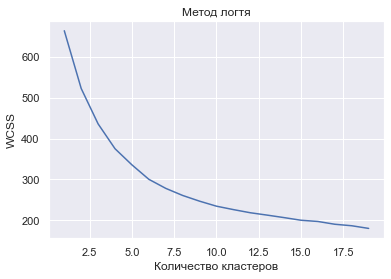

In [334]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('Метод логтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS') 
plt.show()

Судя по графику, явную координату перегиба определить достаточно сложно, однако можем говорить о том, что число кластеров находится в промежутке от 5 до 7. Используем другие методы для определения количества кластеров. Так как для дальнейшего исследования будет применяться метод GGM, то для определения кластеров можно использовать байесовский информационный критерий BIC

In [335]:
from sklearn.mixture import GaussianMixture
gm_bic= []
gm_score=[]
for i in range(1,20):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(df)
    print("BIC для числа кластеров {}: {}".format(i,gm.bic(df)))
    print("Логарифмическая оценка правдоподобия для количества кластеров {}: {}".format(i,gm.score(df)))
    print("-"*100)
    gm_bic.append(-gm.bic(df))
    gm_score.append(gm.score(df))

BIC для числа кластеров 1: -15113.089920785851
Логарифмическая оценка правдоподобия для количества кластеров 1: 3.4881035869300874
----------------------------------------------------------------------------------------------------
BIC для числа кластеров 2: -16513.621671464956
Логарифмическая оценка правдоподобия для количества кластеров 2: 3.8685292402277787
----------------------------------------------------------------------------------------------------
BIC для числа кластеров 3: -20540.595084078377
Логарифмическая оценка правдоподобия для количества кластеров 3: 4.844519896231664
----------------------------------------------------------------------------------------------------
BIC для числа кластеров 4: -22892.1037798142
Логарифмическая оценка правдоподобия для количества кластеров 4: 5.440586580154461
----------------------------------------------------------------------------------------------------
BIC для числа кластеров 5: -25411.16765824768
Логарифмическая оценка правдоп

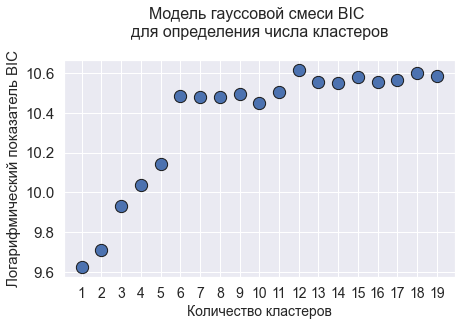

In [336]:
plt.figure(figsize=(7,4))
plt.title("Модель гауссовой смеси BIC \nдля определения числа кластеров\n",fontsize=16)
plt.scatter(x=[i for i in range(1,20)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Количество кластеров",fontsize=14)
plt.ylabel("Логарифмический показатель BIC",fontsize=15)
plt.xticks([i for i in range(1,20)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Метод BIC указывает на 5-6 кластеров. Таким образом будем считать, что клиентская база сегментируется на 6 групп.

### Применение метода

Разделим выборку на обучающую и тестовую. На обучающей применим метод кластеризации, на тестовой - проверим корректность работы метода

In [347]:
chunk_80 = int(len(df) * 0.8)

X_train = df[ :chunk_80]
X_test = df[chunk_80: ]

Используем метод GGM и визуализируем кластеры, применив метода главных компонент PCA для уменьшения размерности и последующей визуализации.

<ipython-input-348-99a17efe8d44>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["predicted_cluster"]]=labels
C:\anaconds\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


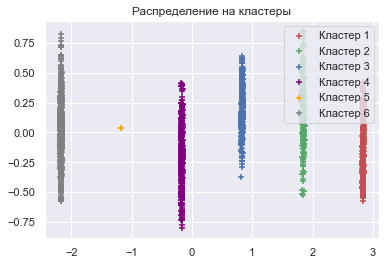

In [348]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Определяем модель и обучаем
n = 6
gmm = GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train)
labels = gmm.predict(X_train)
X_train[["predicted_cluster"]]=labels

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

# Строим в соответствии с пятью классами        
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='+')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='+')
    elif labels[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='purple', marker='+')    
    elif labels[i] == 4:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='orange', marker='+')
    elif labels[i] == 5:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='gray', marker='+')

plt.legend([c1, c2, c3, c4, c5, c6], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4', 'Кластер 5', 'Кластер 6'])
plt.title('Распределение на кластеры')
plt.show()

### Проверка распределения на кластеры

Проверим на тестовой выборке корректность определения кластеров

<ipython-input-349-28027ba22ae3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[["predicted_cluster"]]=labels_
C:\anaconds\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


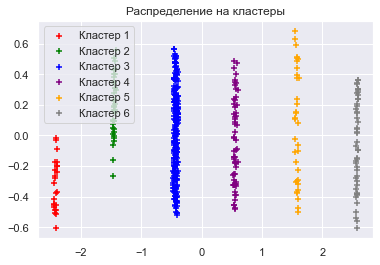

In [349]:
# Определяем модель и обучаем
n = 6
gmm = GaussianMixture(n, covariance_type='full', random_state=0).fit(X_test)
labels_ = gmm.predict(X_test)
X_test[["predicted_cluster"]]=labels_

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(X_test)
pca_2d = pca.transform(X_test)

# Строим в соответствии с пятью классами        
for i in range(0, pca_2d.shape[0]):
    if labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='red', marker='+')
    elif labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='green', marker='+')
    elif labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='blue', marker='+')
    elif labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='purple', marker='+')    
    elif labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='orange', marker='+')
    elif labels_[i] == 5:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='gray', marker='+')

plt.legend([c1, c2, c3, c4, c5, c6], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4', 'Кластер 5', 'Кластер 6'])
plt.title('Распределение на кластеры')
plt.show()

Посмотрим на парную диаграмму, которая иллюстрирует различные перестановки признаков

C:\anaconds\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\anaconds\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


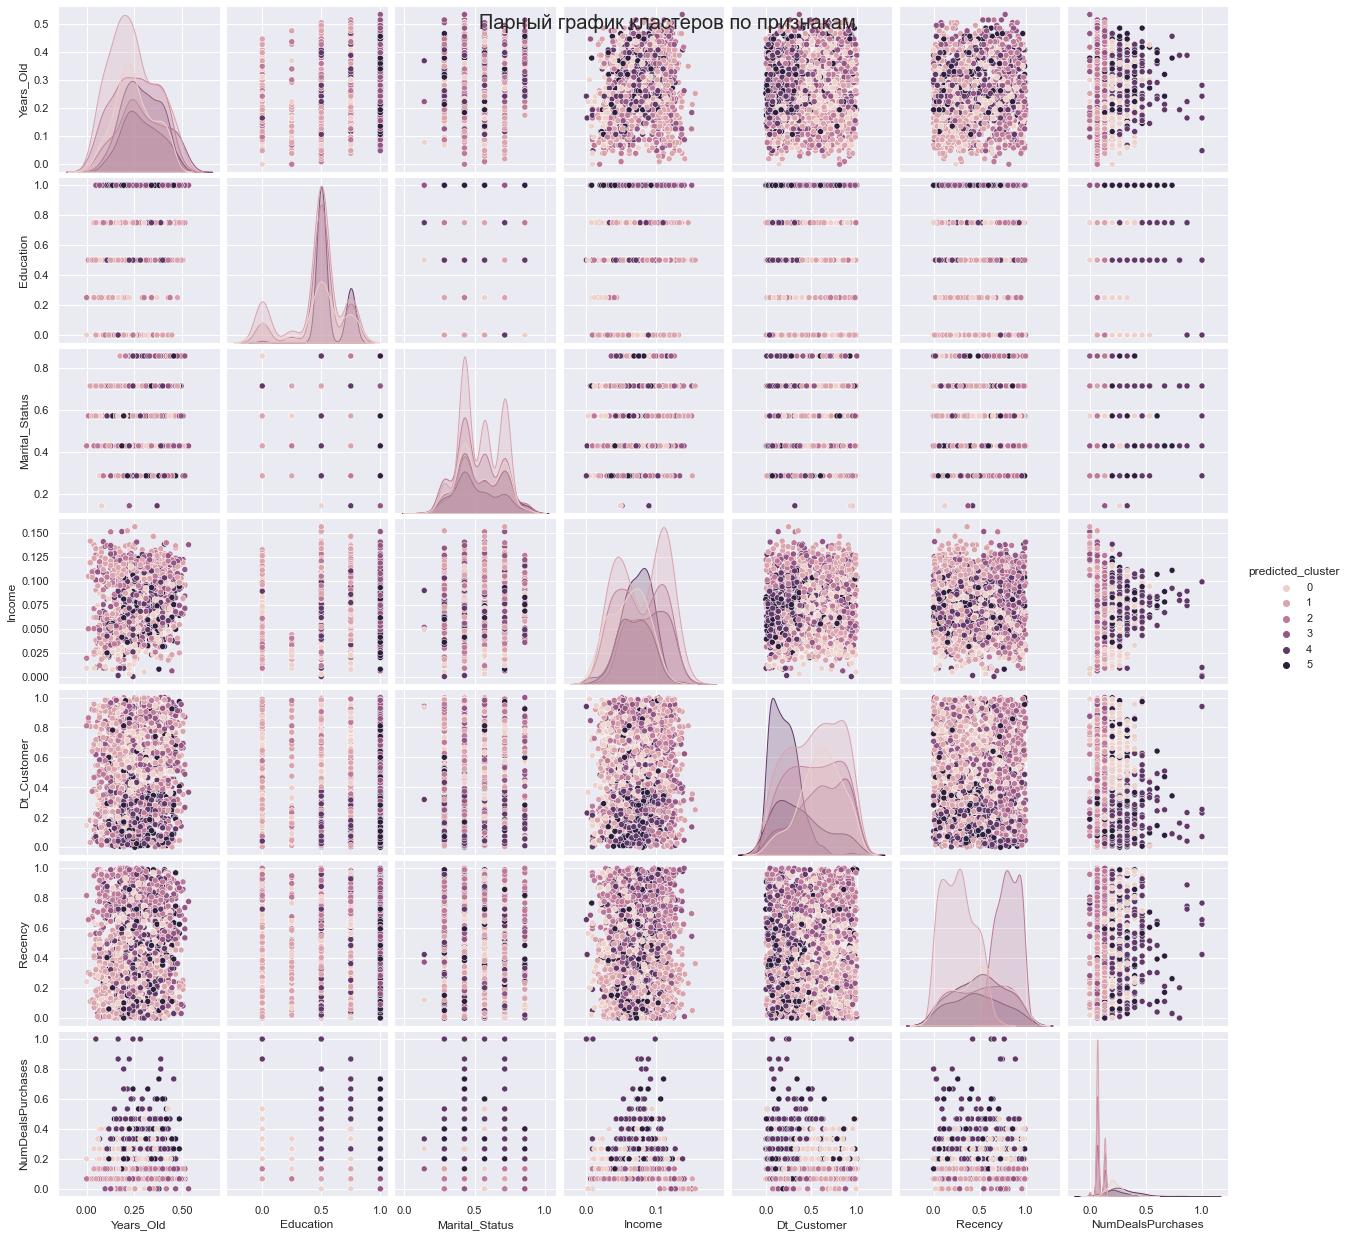

In [314]:
sns.pairplot(X_train, hue="predicted_cluster")

plt.suptitle('Парный график кластеров по признакам', 
             size = 20);

По данной парной диаграмме рассеяния трудно сделать вывод об однозначной разделимости данных на кластеры из-за того, что мы выделили большое количество признаков. Также причиной может быть пересечение облаков кластеров или наложение их друг на друга в данной рассматриваемой плоскости. С другой стороны, есть явно выделяющиеся полосjобразные кластеры на части графиков, что может говорить о слишком очищенных данных.

Чтобы охарактеризовать каждый из них построим графики зависимости кластера от признака

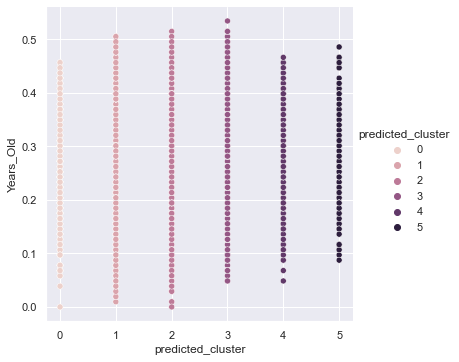

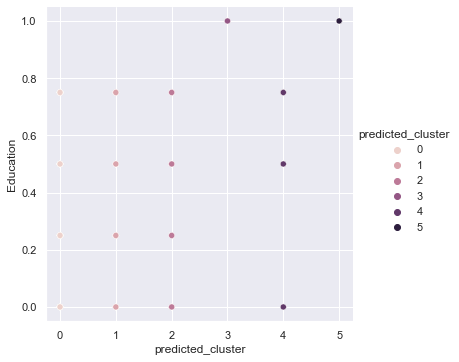

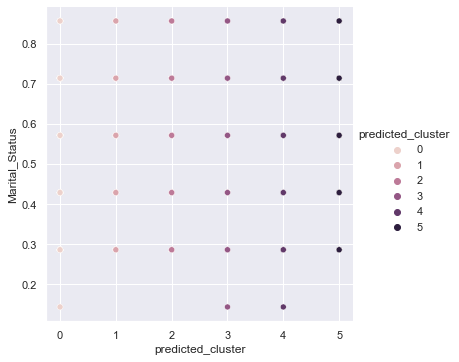

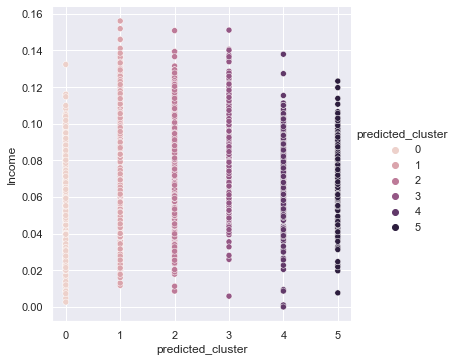

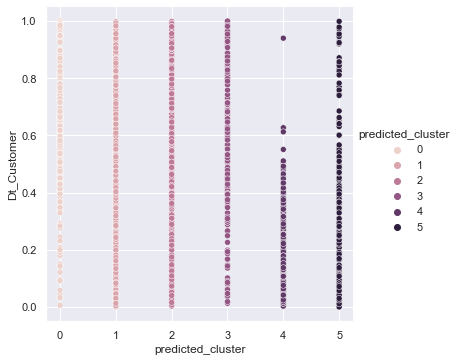

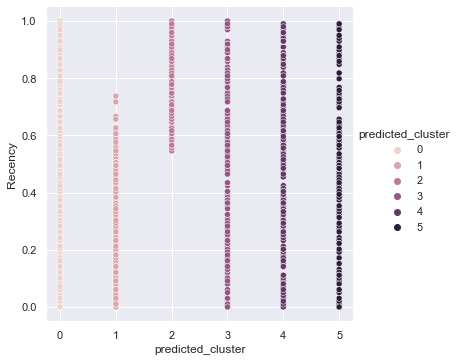

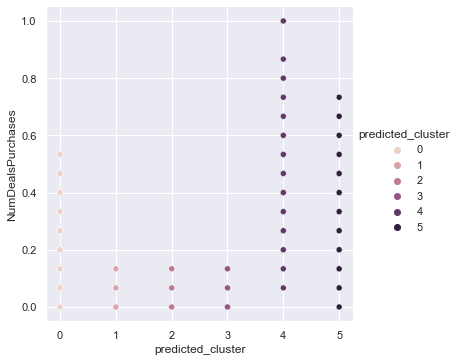

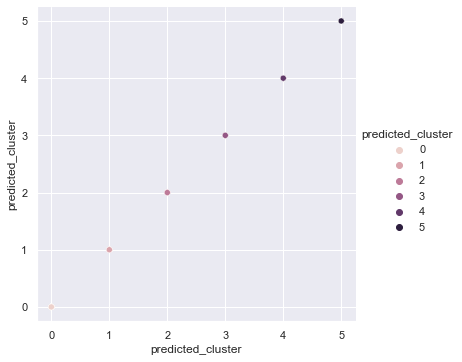

In [315]:
for column in X_train.columns:
    sns.relplot(x='predicted_cluster', y=column, hue="predicted_cluster", data=X_train);

Из графиков распределения признаков по кластерам видно, что по отдельности в оснвном признаки не определяют однозначные характеристики кластера, поэтому выделим только те признаки, которые отличают кластеры друг от друга.

 - 0: от 94 до 476 покупок за 2 года, образование от базововой до магистерской степени, доход ниже среднего-средний
 - 1: от 94 до 476 покупок за 2 года, приобретают продукцию хотя бы раз в месяц и чаще, образование от базововой до магистерской степени
 - 2: от 94 до 130 покупок за 2 года, приобретают продукцию редко (раз в 1,5-3 месяца), образование от базововой до магистерской степени
 - 3: от 94 до 130 покупок за 2 года, "старые" клиенты, образование phd
 - 4: от 58 до 960 покупок за 2 года, средняя возростная категория, образование бакалаврской-магистерской степени
 - 5: от 94 до 635 покупок за 2 года, средняя возростная категория, образование степени phd, средний доход

Выводы:
1. Кластер 0 обладает наибольшими диапазонами значений свойств, про него можно сказать следующее: это клиенты различной возрастной категории, имеющие магистерскую или бакалаврскую степень, с доходом ниже среднего-средним. Они покупают продукцую в магазине абсолютно с разной частотой. Данный кластер необходимо исследовать отдельно.
2. Кластер 1 включает в себя клиентов, которые чаще остальных приобретают продукцию. Этот кластер является основным для компании в плане прироста прибыли.
3. Кластер 2 состоит из клиентов, которые как бы случайно весьма редко заходят в магазин или приобретают продукцию онлайн. Этот клиентский сегмент меньше всего заинтересован в покупке проукции
4. Кластер 3 составляют клиенты, которые являются "старыми" клиентами и пользуются продуктами компании до сих пор.
5. Кластер 4 составляют клиенты, которые в том числе совершили наибольшее количество покупок за 2 года. Таких клиентов стоит включать в разные маркетинговые активности.
6. Кластер 5 составляют клиенты среднего дохода, довольно часто приобритающие подукциюю компании. Аналогичто кластеру 5 их стоит включать в маркетинговые активности

## Классификация

Решим задачу классификации. Предположим, что определенный нами номер кластера является истинным. Необходимо определить какие признаки в большей степени влияют на отнесение объекта к конкретному кластеру

Используем ту же выборку, разбитую на тестовую и обучающую

In [366]:
df['predicted_cluster'] = X_train['predicted_cluster']
df = df.dropna(axis = 0)

from sklearn.model_selection import train_test_split
X = df[['Years_Old', 'Education','Marital_Status', 'Income','Dt_Customer','Recency', 'NumDealsPurchases']]
Y = df['predicted_cluster']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2020, stratify=Y)



Будем сравнивать метрики, характеризующие модель, в трех методах классификации.

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики:
 - precision (точность) демонстрирует способность отличать этот класс от других классов.
 - recall (полнота)  демонстрирует способность алгоритма обнаруживать данный класс.
 - F-мера - среднее гармоническое между precision и recall; достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю
 - accuracy - доля правильных ответов алгоритма

Методы классификации:
 - RandomForestClassifier - метод случайного леса
 - svm - метод опорных векторов
 - KNeighborsClassifier - метод ближайших соседей

In [374]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(min_samples_leaf=50,
                              n_estimators=150,
                              bootstrap=True,
                              oob_score=True,
                              n_jobs=-1,
                              max_features='auto')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['0', '1', '2', '3', '4'])
print(report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        55
           1       0.88      0.18      0.30        39
           2       0.76      0.93      0.84        60
           3       0.99      1.00      0.99        77
           4       0.96      1.00      0.98       122

    accuracy                           0.88       353
   macro avg       0.86      0.80      0.78       353
weighted avg       0.89      0.88      0.86       353



In [369]:
from sklearn import svm
from sklearn.metrics import classification_report
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['0', '1', '2', '3', '4'])
print(report)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        55
           1       1.00      0.72      0.84        39
           2       0.90      0.87      0.88        60
           3       1.00      1.00      1.00        77
           4       0.90      1.00      0.95       122

    accuracy                           0.93       353
   macro avg       0.94      0.89      0.91       353
weighted avg       0.93      0.93      0.92       353



In [376]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['0', '1', '2', '3', '4'])
print(report)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66        55
           1       0.79      0.59      0.68        39
           2       0.80      0.85      0.82        60
           3       1.00      1.00      1.00        77
           4       0.76      0.80      0.78       122

    accuracy                           0.81       353
   macro avg       0.80      0.78      0.79       353
weighted avg       0.81      0.81      0.81       353



Лучший результат получился в методе SVM, так как accuracy = 0.93

In [379]:
Years_Old = 0.25
Education = 0.5
Marital_Status = 0.42
Income = 0.05
Dt_Customer = 0.24
Recency = 0.24
NumDealsPurchases = 0.06
model = svm.SVC()
model.fit(X_train, y_train)
с = model.predict([[Years_Old, Education, Marital_Status, Income, Dt_Customer, Recency, NumDealsPurchases]])
с[0]

5

Таким образом метод SVM предсказал следующий класс для группы клиентов

Построим диаграмму, чтобы наглядно увидеть, какие из признаков имеют наибольшее влияние при распределении объектов на кластеры

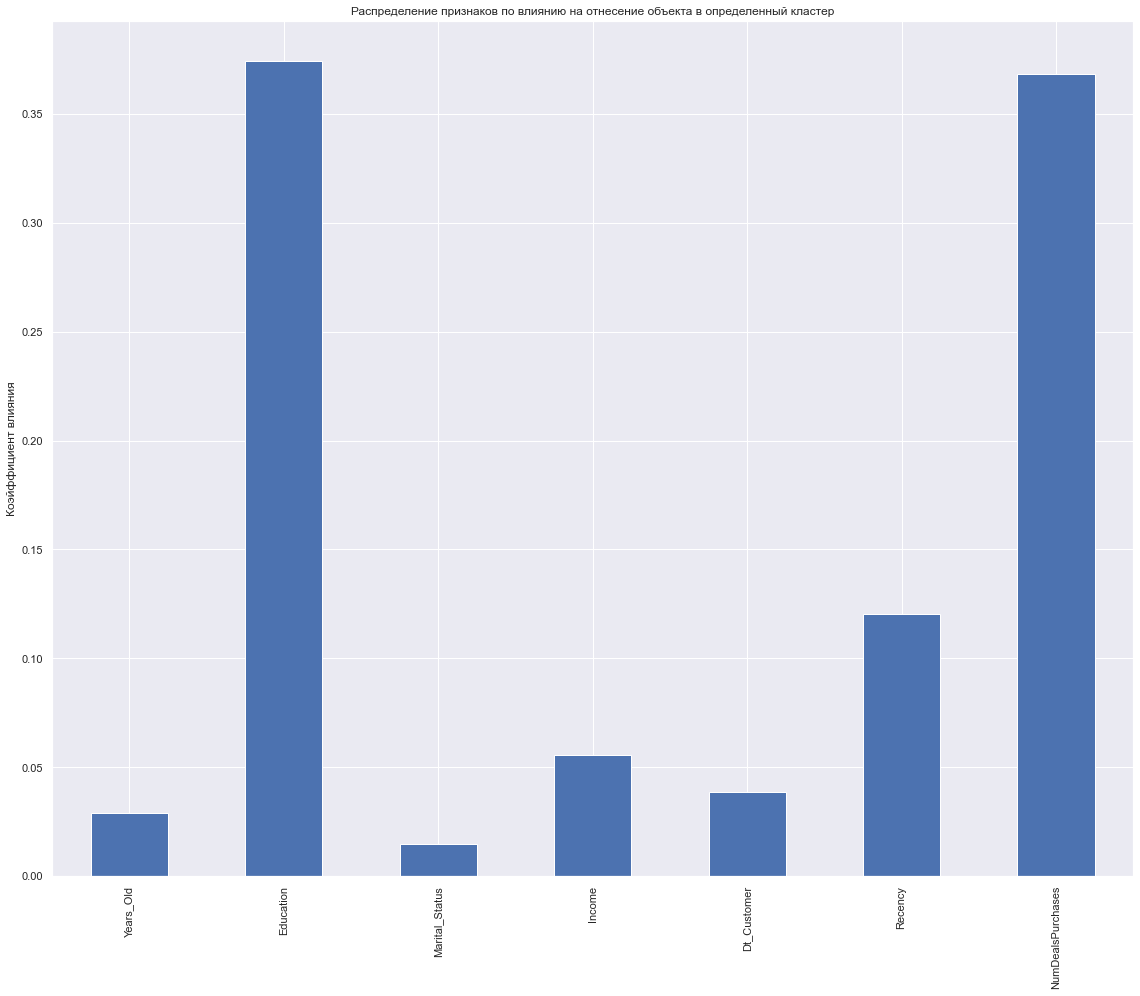

In [381]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl.fit(X_train, y_train)
random_forest_cl_imp = pd.Series(random_forest_cl.feature_importances_,
                         X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
random_forest_cl_imp.plot.bar(ax=ax)
ax.set_title("Распределение признаков по влиянию на отнесение объекта в определенный кластер")
ax.set_ylabel('Коэйффициент влияния')
fig.tight_layout()

Вывод: На отнесение объекта к определенному кластеру в большей степени влияют такие признаки как количество осуществленных покупок или уровень образования